In [1]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [3]:
aggregated_blocks

,geometry,landuse,block_id,is_living,current_population,floors,current_living_area,current_green_capacity,current_green_area,current_parking_capacity,current_industrial_area,area
0,"POLYGON ((344943.719 6647610.514, 344959.205 6...",buildings,0,False,0.0,NaN,0.0,0.0,0.0,0.0,0.0000,4.113091e+01
1,"POLYGON ((344968.687 6647544.000, 344971.625 6...",buildings,1,False,0.0,NaN,0.0,0.0,0.0,0.0,0.0000,1.622221e+02
2,"POLYGON ((344929.592 6647257.521, 344931.964 6...",buildings,2,False,0.0,0.0,0.0,0.0,0.0,0.0,42.6397,4.864831e+01
3,"POLYGON ((344840.676 6647432.974, 344853.943 6...",buildings,3,False,0.0,NaN,0.0,0.0,0.0,0.0,0.0000,6.148153e+01
4,"POLYGON ((344856.398 6647391.171, 344900.097 6...",buildings,4,False,0.0,NaN,0.0,0.0,0.0,0.0,0.0000,3.897924e+02
...,...,...,...,...,...,...,...,...,...,...,...,...
1349,"POLYGON ((346243.206 6647701.284, 346243.206 6...",selected_area,1349,False,0.0,NaN,0.0,0.0,0.0,0.0,0.0000,4.424234e-10
1350,"POLYGON ((347483.986 6647345.029, 347483.627 6...",selected_area,1350,False,0.0,NaN,0.0,0.0,0.0,0.0,0.0000,1.971091e-11
1351,"POLYGON ((347463.977 6647381.345, 347456.841 6...",selected_area,1351,False,0.0,NaN,0.0,0.0,0.0,0.0,0.0000,7.996164e-10
1352,"POLYGON ((344028.826 6648834.242, 344112.884 6...",no_dev_area,1352,False,0.0,3.0,0.0,0.0,0.0,0.0,1535.7700,8.966580e+04


In [4]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
            "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

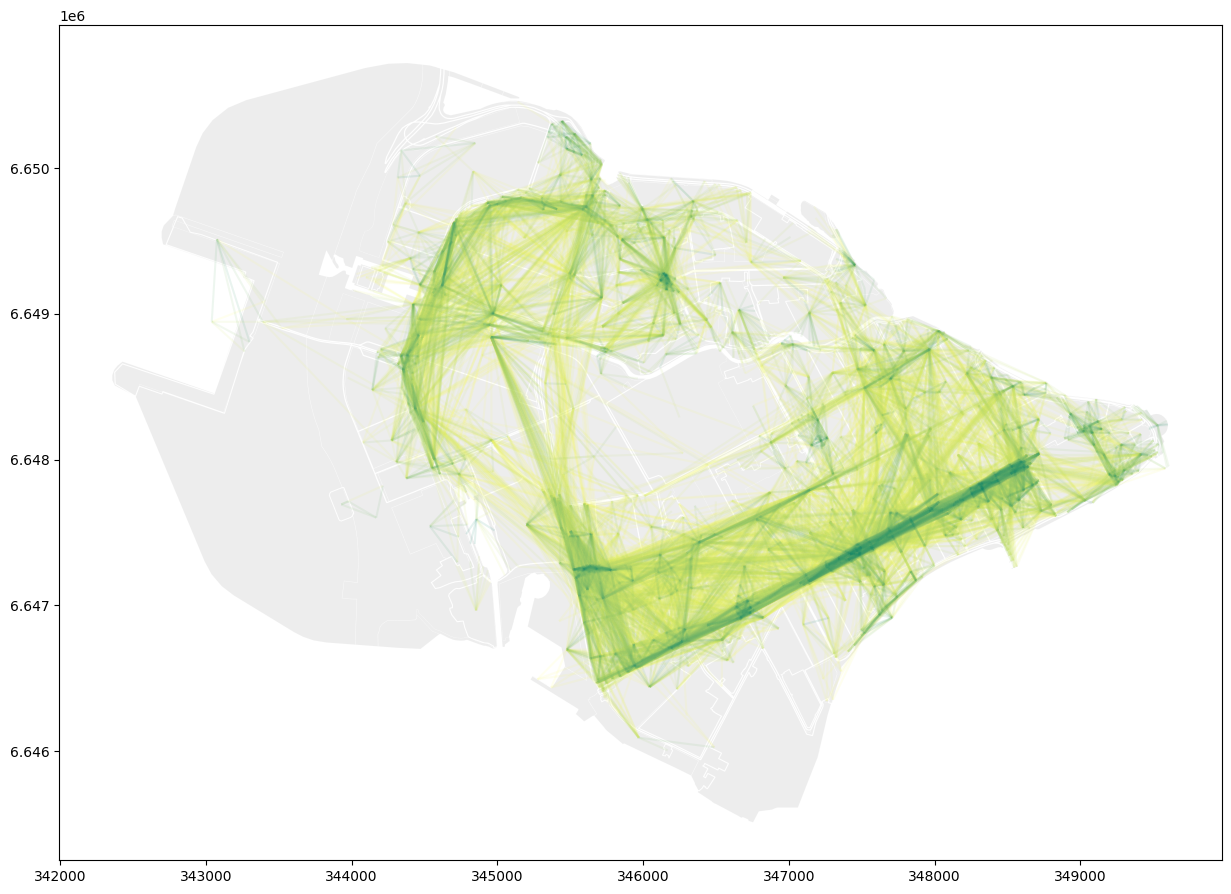

In [6]:
city_model.visualize()

In [7]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    print(service_type)
    services_prov[service_type] = provision.run()

schools
kindergartens
recreational_areas
hospitals
pharmacies
policlinics


In [8]:
for name in services_prov:
  print(name)

schools
kindergartens
recreational_areas
hospitals
pharmacies
policlinics


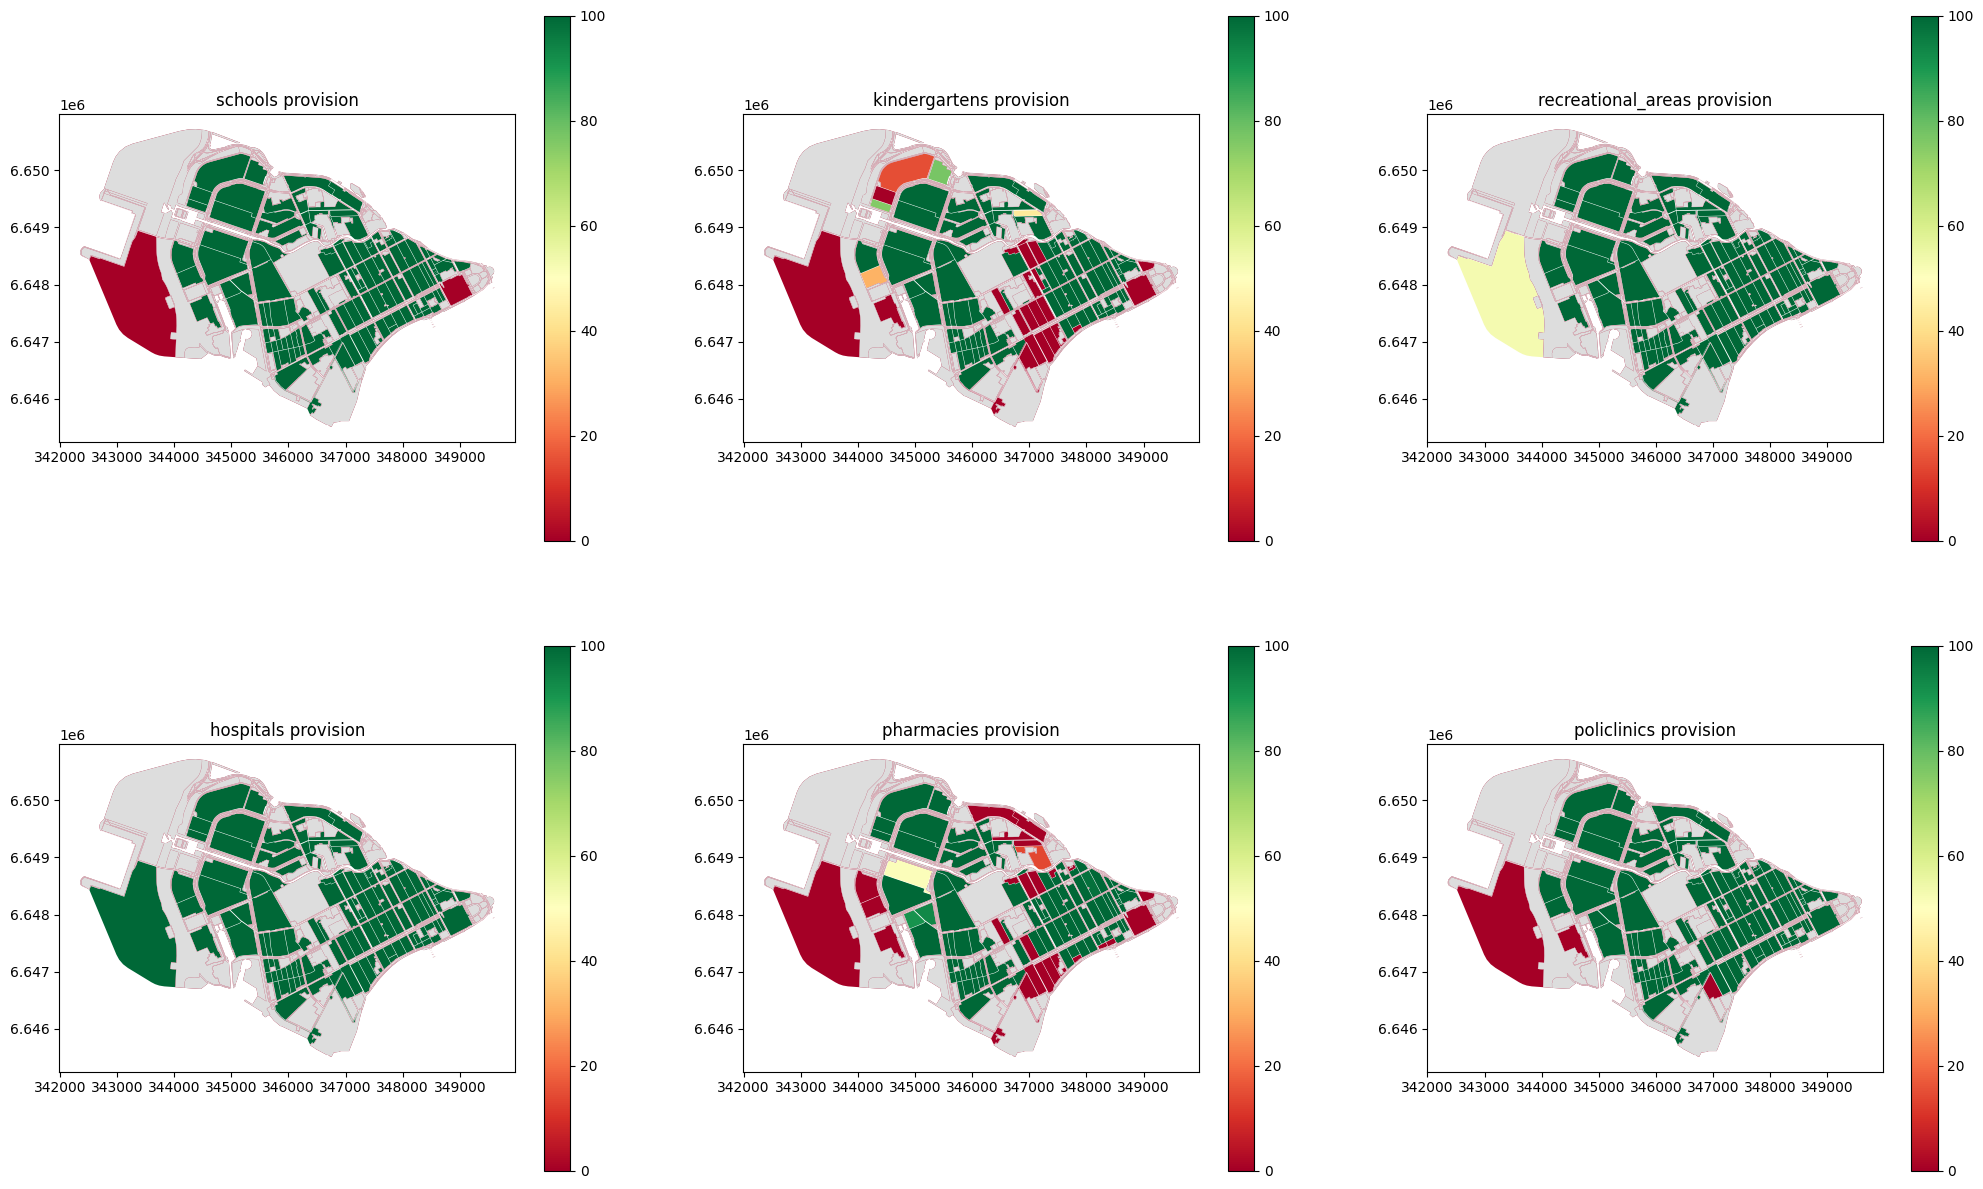

In [10]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def show_me_chart(fig, gs, prov, name, i):
  ax = fig.add_subplot(gs[i//3, i%3])
  prov.plot(column="provision_"+name, legend=True, ax=ax, cmap='RdYlGn')
  ax.set_title(name +" provision")
  prov[prov["population"] == 0].plot(ax=ax, color="#ddd", alpha=1)


kindergartens_prov = services_prov["kindergartens"]
schools_prov = services_prov["schools"]
recreational_areas_prov = services_prov["recreational_areas"]
hospitals_prov = services_prov["hospitals"]
pharmacies_prov = services_prov["pharmacies"]
policlinics_prov = services_prov["policlinics"]

fig = plt.figure(figsize=(25, 15))
gs = GridSpec(2, 3, figure=fig)

i = 0
for service_type in services_prov:
  show_me_chart(fig, gs, services_prov[service_type], service_type, i)
  i = i+1

plt.show()